In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_csv('./datasets/cars.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data preparation

### Feature engineering

* 'CarName' feature will be changed into 'brand'. So only first word that represents brand of car. Model will be ignored and deleted because dataset is small and there are way to much unique models.
* car_ID will be deleted, because it wont give any information to model abour car
* symboling will be deleted, because its not clear what it represents

In [26]:
df['brand']=df['CarName'].apply(lambda word: word.split(' ')[0])
df=df.drop(['car_ID','symboling','CarName'],axis=1)

In [27]:
df['brand'].value_counts()

brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

There is some naming errors, so lets check them

In [28]:
corrections={
    'maxda':'mazda',
    'porcshce':'porsche',
    'Nissan':'nissan',
    'toyouta':'toyota'
}
df['brand']=df['brand'].map(corrections).fillna(df['brand'])
df['brand']=df['brand'].apply(lambda word: 'volkswagen' if word in ['vw','vokswagen'] else word)

In [29]:
df['brand'].value_counts()

brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

### Possible values

In [30]:
# Numerical
num_cols=['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 
          'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 
          'highwaympg']

for col in num_cols:
    print(f'{col} | Mean: {df[col].mean()} | Min: {df[col].min()} | Max:{df[col].max()}','\n')

wheelbase | Mean: 98.75658536585367 | Min: 86.6 | Max:120.9 

carlength | Mean: 174.04926829268288 | Min: 141.1 | Max:208.1 

carwidth | Mean: 65.90780487804878 | Min: 60.3 | Max:72.3 

carheight | Mean: 53.72487804878049 | Min: 47.8 | Max:59.8 

curbweight | Mean: 2555.5658536585365 | Min: 1488 | Max:4066 

enginesize | Mean: 126.90731707317073 | Min: 61 | Max:326 

boreratio | Mean: 3.329756097560975 | Min: 2.54 | Max:3.94 

stroke | Mean: 3.255414634146341 | Min: 2.07 | Max:4.17 

compressionratio | Mean: 10.142536585365855 | Min: 7.0 | Max:23.0 

horsepower | Mean: 104.1170731707317 | Min: 48 | Max:288 

peakrpm | Mean: 5125.121951219512 | Min: 4150 | Max:6600 

citympg | Mean: 25.21951219512195 | Min: 13 | Max:49 

highwaympg | Mean: 30.75121951219512 | Min: 16 | Max:54 



In [35]:
# Categorical
cat_cols=df.columns.to_list()
[cat_cols.remove(col) for col in num_cols+['price']]
for col in cat_cols:
    print(f'{col}: {df[col].unique()}','\n')

fueltype: ['gas' 'diesel'] 

aspiration: ['std' 'turbo'] 

doornumber: ['two' 'four'] 

carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drivewheel: ['rwd' 'fwd' '4wd'] 

enginelocation: ['front' 'rear'] 

enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 

cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 

fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 

brand: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 



### Missing values

In [6]:
print(df.isnull().sum())

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
dtype: int64


All columns are filled

### Encoding

In [7]:
df.nunique()

fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
brand                22
dtype: int64

Encoding methods for categorical columns
1) fueltype              2 - dummy
2) aspiration            2 - dummy
3) doornumber            2 - dummy
4) carbody               5 - label
5) drivewheel            3 - dummy
6) enginelocation        2 - dummy
7) enginetype            7 - label
8) cylindernumber        7 - ordinal
9) brand                28 - count
10) model               115 - frequency
11) fuelsystem           8 - label

In [8]:
dummy_cols=['fueltype','aspiration','doornumber','drivewheel','enginelocation']
for col in dummy_cols:
    df=pd.concat([df,pd.get_dummies(df[col],drop_first=True,prefix=col)],axis=1)
    df=df.drop(col,axis=1)

In [9]:
cyl_nums={
    'four':4,
    'six':6,
    'five':5,
    'three':3,
    'twelve':12,
    'two':2,
    'eight':8
}
df['cylindernumber']=df['cylindernumber'].map(cyl_nums)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['carbody']=label_encoder.fit_transform(df['carbody'])
df['enginetype']=label_encoder.fit_transform(df['enginetype'])
df['fuelsystem']=label_encoder.fit_transform(df['fuelsystem'])

In [11]:
df['brand']=df['brand'].map(df['brand'].value_counts())

In [12]:
df.loc[0:4,list(df.columns[-6:])+['cylindernumber','carbody','enginetype','fuelsystem','brand']]

,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,cylindernumber,carbody,enginetype,fuelsystem,brand
0,True,False,True,False,True,False,4,0,0,5,3
1,True,False,True,False,True,False,4,0,0,5,3
2,True,False,True,False,True,False,6,2,5,5,3
3,True,False,False,True,False,False,4,3,3,5,7
4,True,False,False,False,False,False,5,3,3,5,7


### Anomalies detection

Numeric columns

1) wheelbase               53
2) carlength               75
3) carwidth                44
4) carheight               49
5) curbweight             171
6) enginesize              44
7) boreratio               38
8) stroke                  37
9) compressionratio        32
10) horsepower              59
11) peakrpm                 23
12) citympg                 29
13) highwaympg              30

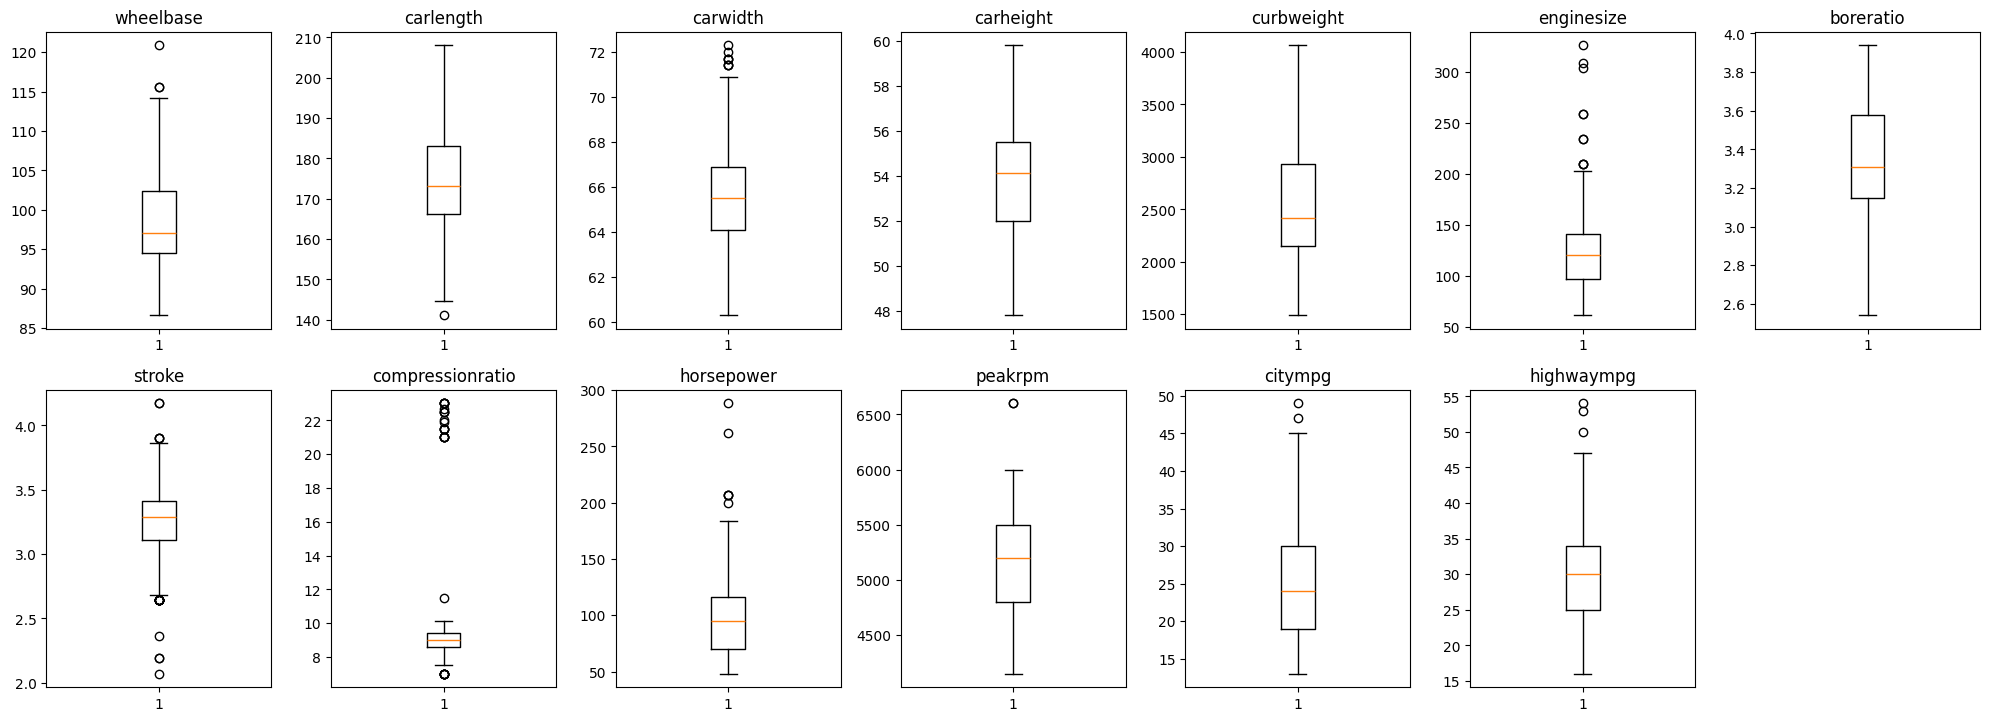

In [13]:
num_cols=['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 
          'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 
          'highwaympg']
plt.figure(figsize=(20,25))
for ind,col in enumerate(num_cols):
    plt.subplot((len(num_cols)+1)//2,7,ind+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

There are few columns that have anomalies, but only compressionration worth for anomalies deletion. Price column also have outliers, but bigger can be because of brand, like luxury brands. IQR method for harsh anomalies deleting 

In [14]:
q1=df['compressionratio'].quantile(0.25)
q3=df['compressionratio'].quantile(0.75)
iqr=q3-q1
lower=iqr-1.5*q1
upper=iqr+1.5*q3
outls=df[(df['compressionratio']<lower)|(df['compressionratio']>upper)]
df=df.drop(outls.index,axis=0)

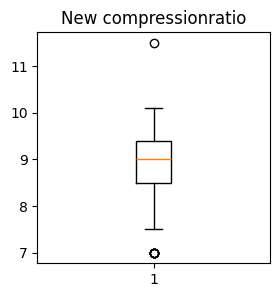

In [15]:
plt.figure(figsize=(3,3))
plt.boxplot(df['compressionratio'])
plt.title('New compressionratio')
plt.show()

### Scaling

In [16]:
df[num_cols+['price']]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0


In [21]:
from sklearn.preprocessing import StandardScaler
standart_scaler=StandardScaler()
df[num_cols+['price']]=standart_scaler.fit_transform(df[num_cols+['price']])

In [25]:
df[num_cols+['price']]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.705528,-0.362281,-0.794626,-1.954619,0.059123,0.095379,0.539604,-1.733368,0.203221,0.118593,-0.460725,-0.583129,-0.507691,0.062189
1,-1.705528,-0.362281,-0.794626,-1.954619,0.059123,0.095379,0.539604,-1.733368,0.203221,0.118593,-0.460725,-0.583129,-0.507691,0.439569
2,-0.651583,-0.164162,-0.117626,-0.456430,0.609515,0.614353,-2.398665,0.753934,0.203221,1.190649,-0.460725,-0.900888,-0.660659,0.439569
3,0.295182,0.281605,0.220875,0.334281,-0.363177,-0.400005,-0.501808,0.533541,1.655920,-0.105791,0.692646,-0.106492,-0.048785,0.119330
4,0.223728,0.281605,0.317589,0.334281,0.611516,0.236917,-0.501808,0.533541,-1.249478,0.218319,0.692646,-1.059767,-1.272534,0.558874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1.099039,1.288708,0.704446,1.666004,1.277990,0.095379,1.097504,-0.253581,-1.975828,1.390101,-0.230051,-1.218646,-1.272534,0.747250
200,1.956486,1.288708,1.526518,0.833677,0.867698,0.354866,1.692596,-0.253581,0.929570,0.193388,0.461972,-0.265371,-0.354722,0.482896
201,1.956486,1.288708,1.478161,0.833677,1.061836,0.354866,1.692596,-0.253581,-0.232589,1.340238,0.231298,-0.900888,-0.813628,0.759180
202,1.956486,1.288708,1.526518,0.833677,0.987784,1.109737,0.948730,-1.135156,-0.087319,0.692018,0.692646,-1.059767,-1.119565,1.065605


In [26]:
x_train, x_temp, y_train, y_temp = train_test_split(df.drop('price', axis=1),df['price'],test_size=0.3,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp,test_size=0.5,random_state=42)
train_data=pd.concat([x_train,y_train],axis=1)
train_data.to_csv('./datasets/cars_train_data.csv')
test_data=pd.concat([x_test,y_test],axis=1)
test_data.to_csv('./datasets/cars_test_data.csv')
val_data=pd.concat([x_val,y_val],axis=1)
val_data.to_csv('./datasets/cars_val_data.csv')

## Model selection 

In [27]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
x_train,x_test,y_train,y_test=train_test_split(df.drop('price',axis=1),df['price'],random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [28]:
train_metrics=[]
models={
    'poly reg': LinearRegression(),
    'ridge': Ridge(random_state=42),
    'lasso': Lasso(random_state=42),
    'lin reg': LinearRegression(),
    'decision tree': DecisionTreeRegressor(random_state=42),
    'random forest': RandomForestRegressor(random_state=42),
    'gradient boost': GradientBoostingRegressor(random_state=42),
    'svr': SVR()
}

In [29]:
for name,model in models.items():
    print(f'{name} is training')
    if name in ['poly reg','ridge','lasso']:
        model.fit(x_train_poly,y_train)
        pred=model.predict(x_test_poly)
    else:
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
    train_metrics.append({
        'Name': name,
        'MAE': mean_absolute_error(y_test,pred),
        'MSE':mean_squared_error(y_test,pred),
        'RMSE':np.sqrt(mean_squared_error(y_test,pred)),
        'R2 score': r2_score(y_test,pred)
    })

poly reg is training
ridge is training
lasso is training
lin reg is training
decision tree is training
random forest is training
gradient boost is training
svr is training


In [30]:
train_metrics=pd.DataFrame(train_metrics)
train_metrics

,Name,MAE,MSE,RMSE,R2 score
0,poly reg,28.575043,2926.604865,54.098104,-1750.191540
1,ridge,0.391974,0.574726,0.758107,0.656101
2,lasso,0.844682,1.527094,1.235757,0.086233
3,lin reg,0.364085,0.293390,0.541655,0.824444
4,decision tree,0.231932,0.129275,0.359548,0.922646
5,random forest,0.298544,0.208157,0.456242,0.875445
6,gradient boost,0.271958,0.166120,0.407578,0.900599
7,svr,0.460748,0.668851,0.817833,0.599780


In [31]:
print(f'MAE best score: {train_metrics['MAE'].min()} model name: {train_metrics.loc[train_metrics['MAE'].idxmin(),'Name']}')
print(f'MSE best score: {train_metrics['MSE'].min()} model name: {train_metrics.loc[train_metrics['MSE'].idxmin(),'Name']}')
print(f'RMSE best score: {train_metrics['RMSE'].min()} model name: {train_metrics.loc[train_metrics['RMSE'].idxmin(),'Name']}')
print(f'R2 best score: {train_metrics['R2 score'].max()} model name: {train_metrics.loc[train_metrics['R2 score'].idxmax(),'Name']}')

MAE best score: 0.23193174501588865 model name: decision tree
MSE best score: 0.1292750209283079 model name: decision tree
RMSE best score: 0.35954835687054376 model name: decision tree
R2 best score: 0.922645750458896 model name: decision tree


Decision tree look as best choise 

## Hyperparamters tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {
    'max_depth':np.arange(2,20,2),
    'min_samples_split':[2,5,10,15,20,25],
    'min_samples_leaf':[1,2,5,10,15,20],
    'max_features':['sqrt','log2',None],
    'max_leaf_nodes':[None,10,20,50,100,200],
    'splitter':['best','random'],
    
}
grid=GridSearchCV(DecisionTreeRegressor(random_state=42),param_grid,n_jobs=-1,error_score='raise')
grid.fit(x_train,y_train)
pred=grid.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test,pred)}')
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
print(f'R2 score: {r2_score(y_test,pred)}')

MAE: 0.4109924626686918
MSE: 0.5249330954485305
RMSE: 0.7245226673117484
R2 score: 0.6858959653139131


In [34]:
grid.best_params_

{'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}